In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

# Steps to follow for manual Watershed - 
- First we get the img
- Then we blur it to make only corners visible
- Then we do a- binary_inv threshold to it - so that the background goes black and our objects goes white
- We can also add threshold - otsu to remove noise
- Remove noise by doing erosion - morphological operation of opening
- Then we make a dialated version of this - we get our sure bg
- Then we do distance transformation  - the more far a pixel is from 0 - background, the higher its value goes... so middle wali ki value is highest.
- Now we will do normal binary threshold on this distance transformed image - with max value as dist_transform ka max ka 70% - which means only middle part - will reaming very white - others will go very black,. This is our sure foreground.
- Now we got sure_bg and sure_fg - do a cv2.subtract on them
- Now we make these 6 or whatever number of regions are markers. using ConnectedMarker and then add 1 to marker. So that it makes unknown region as 1
- Now give it to watershed.
- Now get contours from this watershed img. And draw it on real img
  

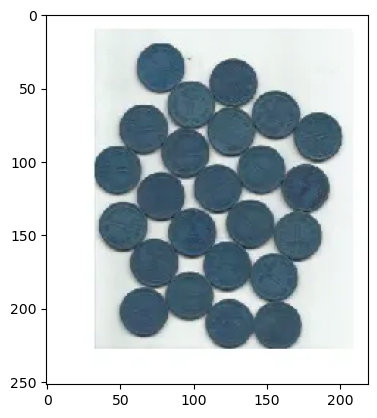

In [496]:
coin = cv2.imread('DATA/coins6.webp')
plt.imshow(coin, cmap="viridis")

In [498]:
def display(img):
    plt.figure(figsize=(12,8))
    plt.imshow(img, cmap='gray')

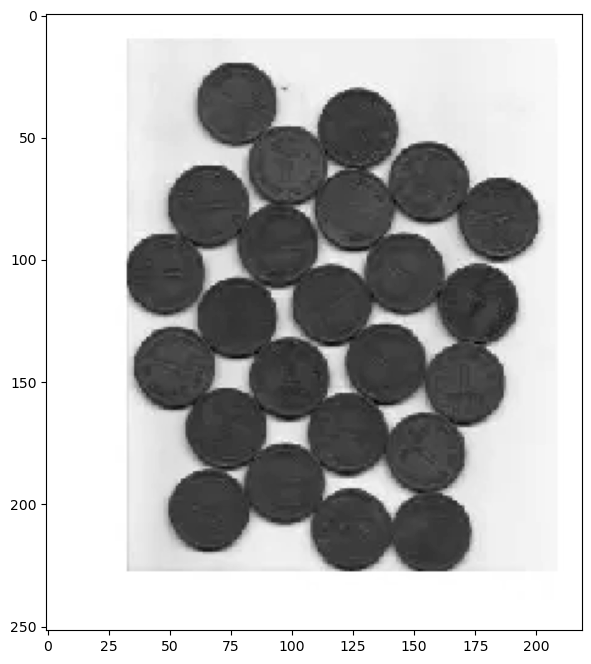

In [500]:
gray_coins = cv2.cvtColor(coin, cv2.COLOR_BGR2GRAY)
display(gray_coins)

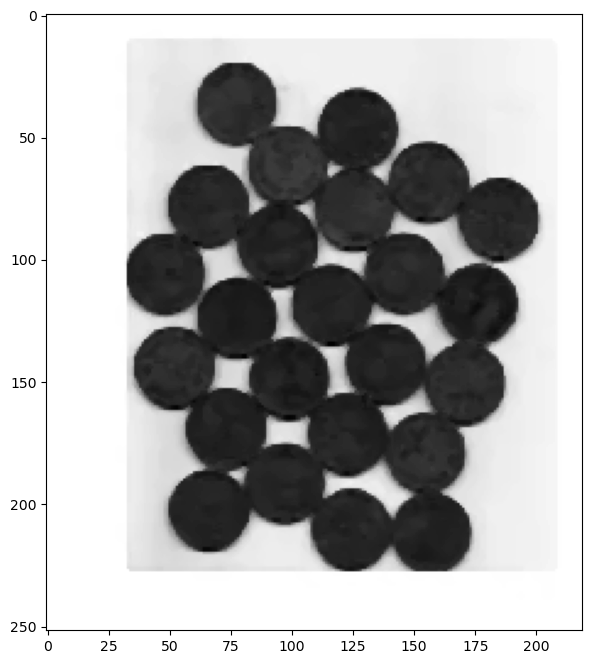

In [502]:
blur = cv2.medianBlur(gray_coins, 3)
display(blur)

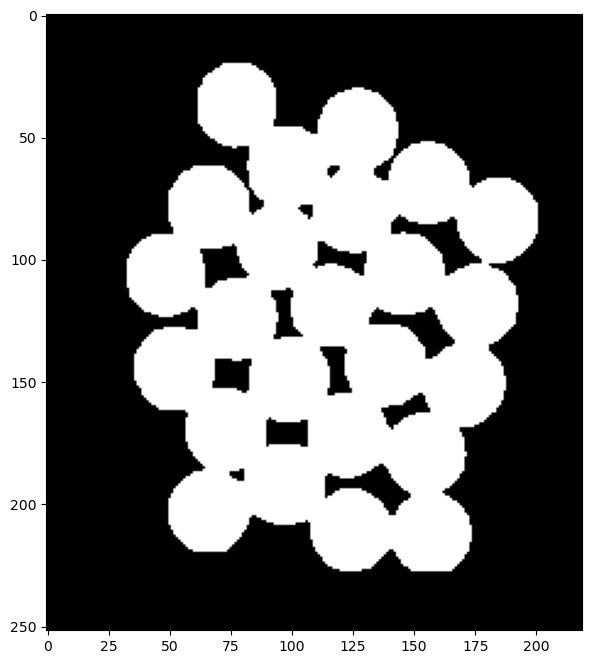

In [504]:
ret, thresh = cv2.threshold(blur, 125, 225, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh)

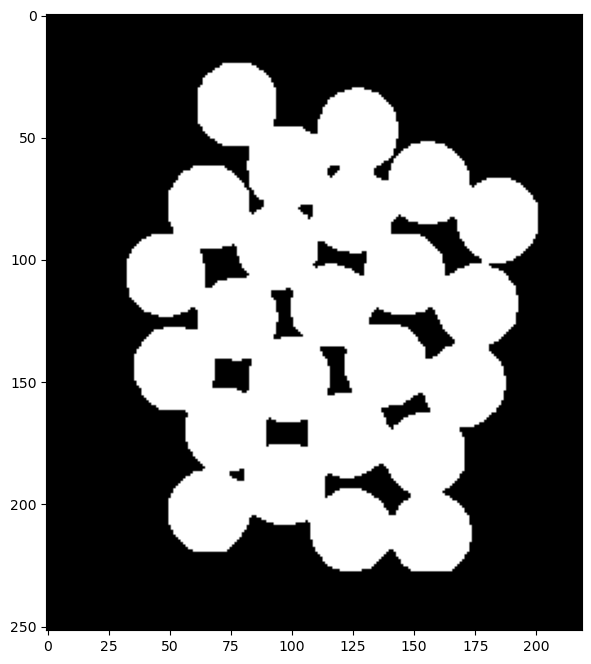

In [506]:
open = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel = np.ones((3,3),np.uint8))
display(open)

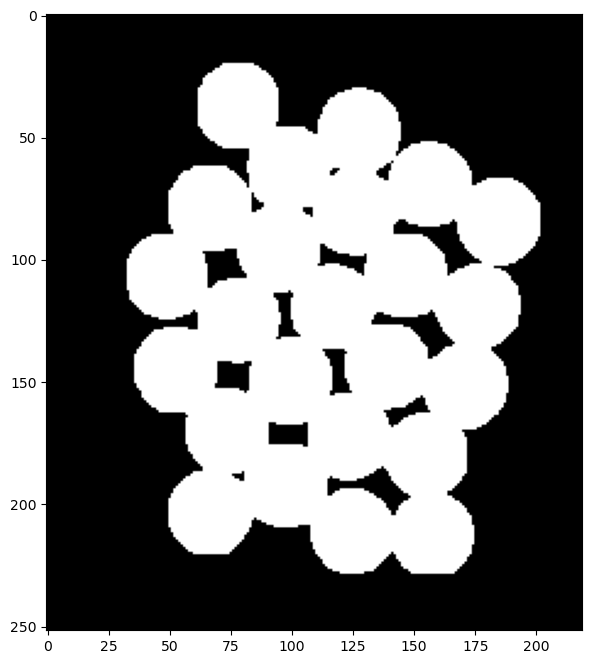

In [508]:
sure_bg = cv2.dilate(open, np.ones((2,2),np.uint8), iterations=1)
display(sure_bg)

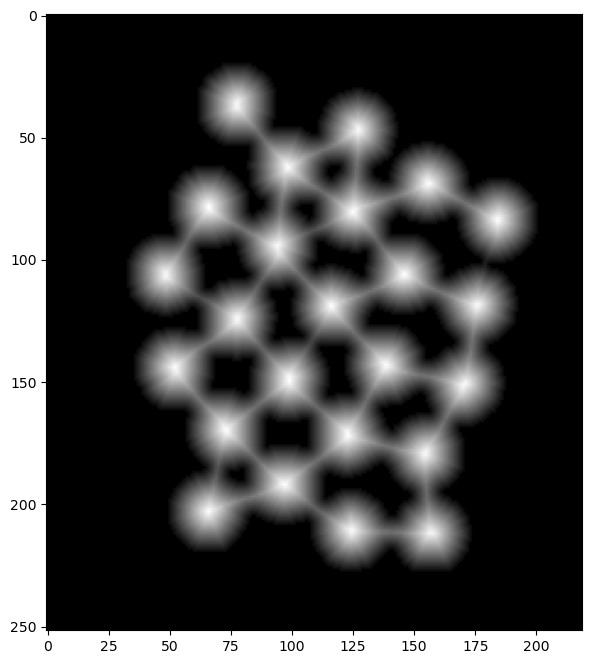

In [510]:
dist_trans = cv2.distanceTransform(open, cv2.DIST_L2, 5)
display(dist_trans)

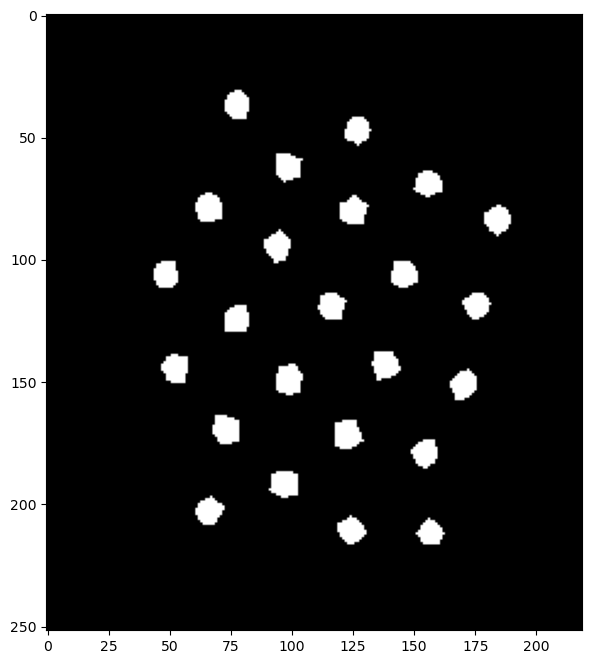

In [512]:
ret, sure_fg = cv2.threshold(dist_trans, 0.7*dist_trans.max(),255, cv2.THRESH_BINARY)
display(sure_fg)

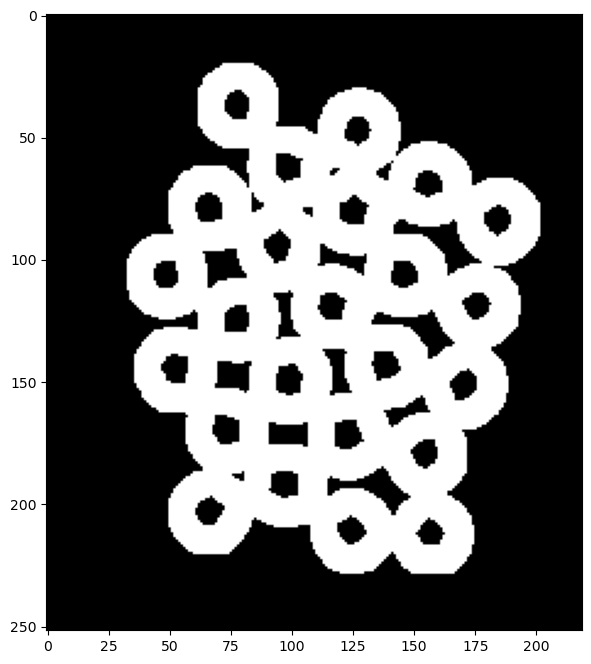

In [514]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

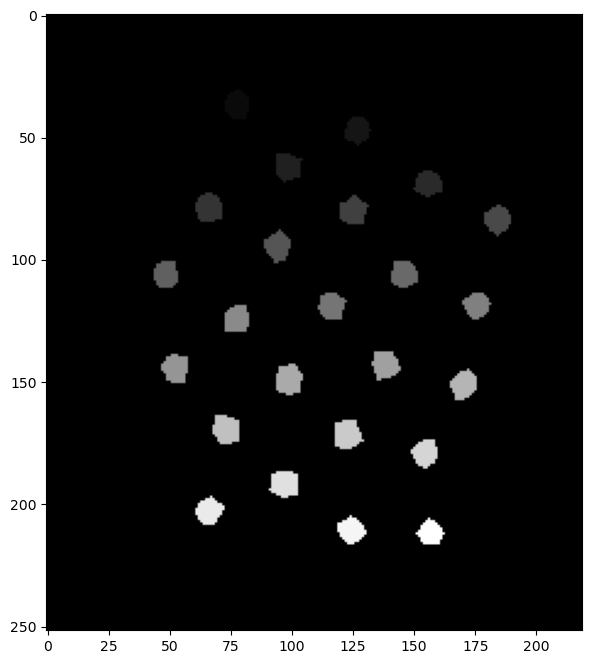

In [516]:
ret, marker = cv2.connectedComponents(sure_fg)
display(marker)

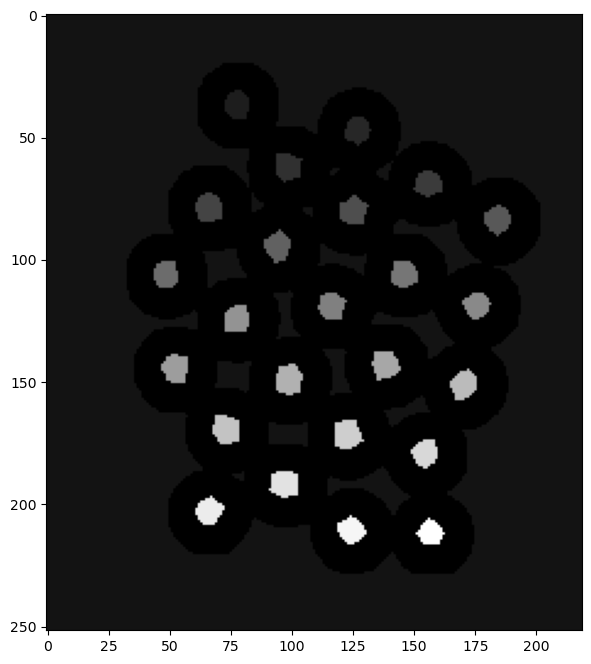

In [518]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 2
markers[unknown==225] = 0 
display(markers)

In [520]:
unknown.max()

225

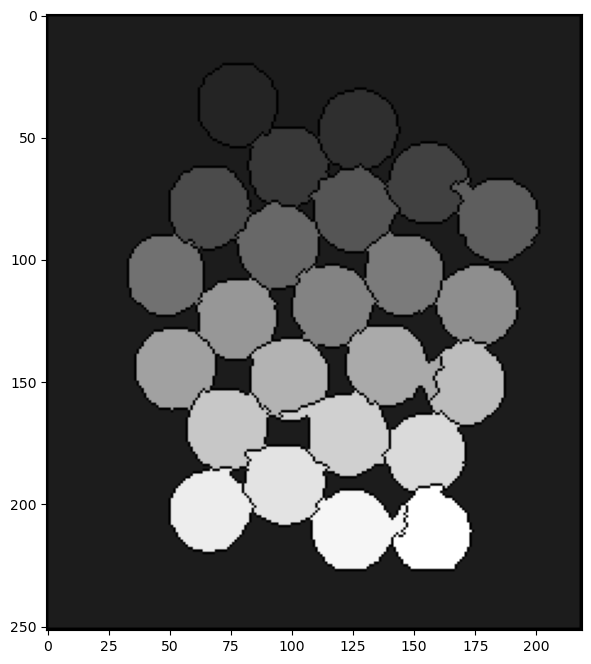

In [522]:
st = cv2.watershed(coin, markers)
display(st)

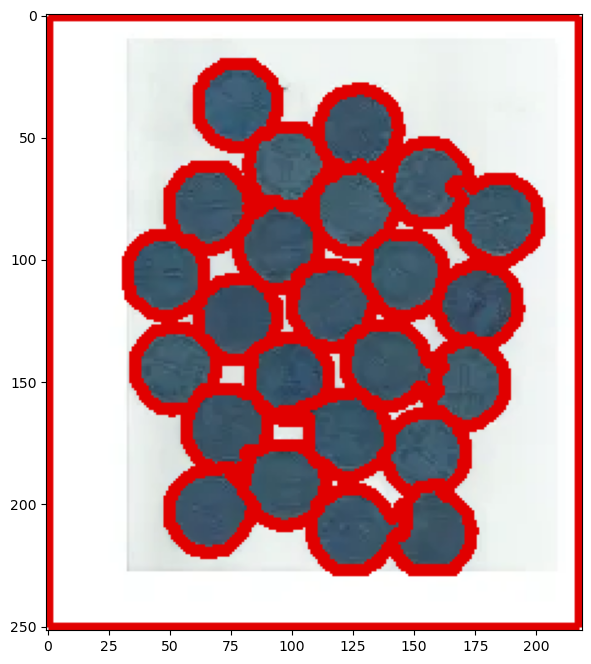

In [526]:
cont, hier = cv2.findContours(st.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(cont)):
    cv2.drawContours(coin, cont,i,(225,0,0), 2)
display(coin)

In [486]:
hier

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [10,  8, -1, -1],
        [11,  9, -1, -1],
        [12, 10, -1, -1],
        [13, 11, -1, -1],
        [14, 12, -1, -1],
        [15, 13, -1, -1],
        [16, 14, -1, -1],
        [17, 15, -1, -1],
        [18, 16, -1, -1],
        [19, 17, -1, -1],
        [20, 18, -1, -1],
        [21, 19, -1, -1],
        [22, 20, -1, -1],
        [23, 21, -1, -1],
        [24, 22, -1, -1],
        [25, 23, -1, -1],
        [26, 24, -1, -1],
        [27, 25, -1, -1],
        [28, 26, -1, -1],
        [29, 27, -1, -1],
        [30, 28, -1, -1],
        [31, 29, -1, -1],
        [32, 30, -1, -1],
        [33, 31, -1, -1],
        [34, 32, -1, -1],
        [35, 33, -1, -1],
        [36, 34, -1, -1],
        [37, 35, -1, -1],
        [-1, 36, -1, -1]]], dtype=int3